In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## apply feature engineering to these data points
- feature importance
- feature selection: filter method
- feature extraction / dimensionality reduction: PCA

In [3]:
data = pd.read_csv('german_credit.csv')

In [47]:
# feature importance
X, y = data.loc[:, data.columns!='Creditability'], data['Creditability']

model = RandomForestClassifier(n_jobs=2, random_state=0)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
Credit Amount,0.142556
Account Balance,0.126895
Age (years),0.107485
Duration of Credit (month),0.096858
Purpose,0.061145
Payment Status of Previous Credit,0.055812
Length of current employment,0.050963
Duration in Current address,0.047747
Value Savings/Stocks,0.047325
Instalment per cent,0.041170


In [49]:
X, y = data.loc[:, data.columns!='Creditability'], data['Creditability']

In [50]:
# filter method
chisq_selector = SelectKBest(chi2, k=15)
X_kbest = chisq_selector.fit_transform(X, y)

In [6]:
X_new = X[X.columns[chisq_selector.get_support()]]

In [12]:
# PCA
x = X.values 
x = scale(x)

/home/sahibachopra/miniconda/envs/ai/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [15]:
covar_matrix = PCA(n_components = 15) #we have 15 features

In [18]:
covar_matrix.fit(x)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

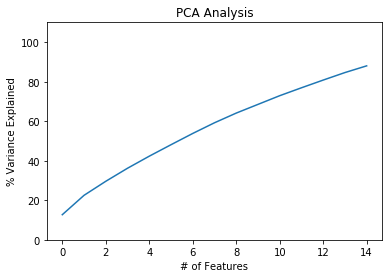

In [21]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,110)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [28]:
# feature selection using wrapper method

clf = RandomForestClassifier(n_jobs=2, random_state=0)
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(clf, 13)
rfe = rfe.fit(X_new, y)

In [29]:
X_new_v2 = X_new[X_new.columns[rfe.get_support()]]

In [30]:
X_new_v2.shape

(1000, 13)

In [31]:
names = X_new.columns
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, 'Account Balance'), (1, 'Age (years)'), (1, 'Concurrent Credits'), (1, 'Credit Amount'), (1, 'Duration of Credit (month)'), (1, 'Instalment per cent'), (1, 'Length of current employment'), (1, 'Most valuable available asset'), (1, 'No of Credits at this Bank'), (1, 'Payment Status of Previous Credit'), (1, 'Purpose'), (1, 'Sex & Marital Status'), (1, 'Value Savings/Stocks'), (2, 'Telephone'), (3, 'Foreign Worker')]


In [52]:
X_new_v2.to_csv('fe_data.csv', index=False)

In [58]:
X_new.to_csv('fe_data.csv', index=False)

In [57]:
pd.DataFrame(y).to_csv('y.csv', index= False)

In [54]:
y.shape

(1000,)